<a href="https://colab.research.google.com/github/pihk94/Free2move/blob/master/Analyse_Melchior_Prugniaud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analyse des données e-commerce

Tout d'abord, importons les packages que nous utiliserons.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import des fichiers csv.

In [ ]:
!wget https://raw.githubusercontent.com/pihk94/Free2move/master/data/customer.csv customer.csv
!wget https://raw.githubusercontent.com/pihk94/Free2move/master/data/orders.csv orders.csv
!wget https://raw.githubusercontent.com/pihk94/Free2move/master/data/items.csv items.csv
!wget https://raw.githubusercontent.com/pihk94/Free2move/master/data/products.csv products.csv


In [4]:
products = pd.read_csv('products.csv')
items = pd.read_csv('items.csv')
customers = pd.read_csv('customer.csv')
orders = pd.read_csv('orders.csv')

In [5]:
for i,j in zip([products, items, customers, orders],['products','items','customers','orders']):
    print('Les dimensions de {} sont : {} entrées pour {} colonnes.\nLes variables sont :\n {}\n'.format(
    j, i.shape[0], i.shape[1], list(i.columns) ))

Les dimensions de products sont : 32951 entrées pour 10 colonnes.
Les variables sont :
 ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english']

Les dimensions de items sont : 112650 entrées pour 7 colonnes.
Les variables sont :
 ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Les dimensions de customers sont : 99441 entrées pour 5 colonnes.
Les variables sont :
 ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Les dimensions de orders sont : 99441 entrées pour 8 colonnes.
Les variables sont :
 ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']



## Rapide statistiques descriptives des différentes tables

Commençons par la table 'products'.



In [6]:
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32328 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


Cette table contient 10 colonnes, dont une qui est l'id du produit et les autres concernent les spécificités des objets (poids, dimensions...). De plus, on retrouve des valeurs manquantes ou nulles pour toutes les colonnes exceptés l'identifiant du produit.

Deux colonnes se ressemblent, product_category_name et product_category_name_english, voyons si elles sont identiques.

In [8]:
products[(products.product_category_name != products.product_category_name_english)].product_category_name.map(str).value_counts()

nan    623
Name: product_category_name, dtype: int64

In [9]:
products.drop('product_category_name_english',axis = 1, inplace=True)

In [10]:
print('Liste des 20 catégories de produits les plus présentes')
products.product_category_name.value_counts().head(20)

Liste des 20 catégories de produits les plus présentes


bed_bath_table                     3029
sports_leisure                     2867
furniture_decor                    2657
health_beauty                      2444
housewares                         2335
auto                               1900
computers_accessories              1639
toys                               1411
watches_gifts                      1329
telephony                          1134
baby                                919
perfumery                           868
stationery                          849
fashion_bags_accessories            849
cool_stuff                          789
garden_tools                        753
pet_shop                            719
electronics                         517
construction_tools_construction     400
home_appliances                     370
Name: product_category_name, dtype: int64

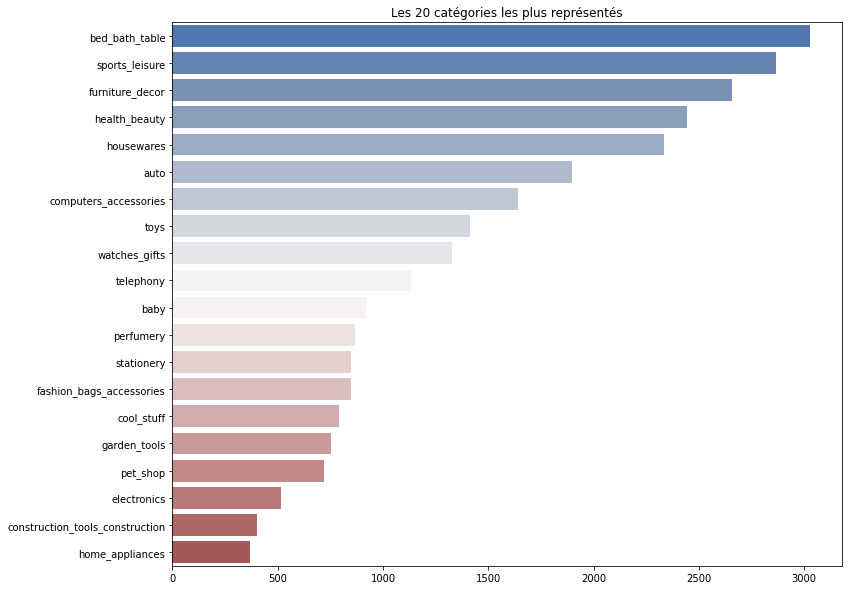

In [11]:
plt.figure(figsize=(12,10))
plt.title('Les 20 catégories les plus représentés')
sns.barplot(x = products.product_category_name.value_counts().head(20).values, y = products.product_category_name.value_counts().head(20).index, palette="vlag")

Pour les autres variables, on peut représenter la distribution de chacune permettant ainsi de tirer quelques observations comme par exemple qu'en moyenne les produits sont de petites tailles (20cm x 20cm x 20cm) et font un poids aux alentours de 1 kg. Ce qui correspond bien aux observations réalisés ci-dessus dans les catégories les plus vendues (parfums, téléphone, fourniture de décor...).

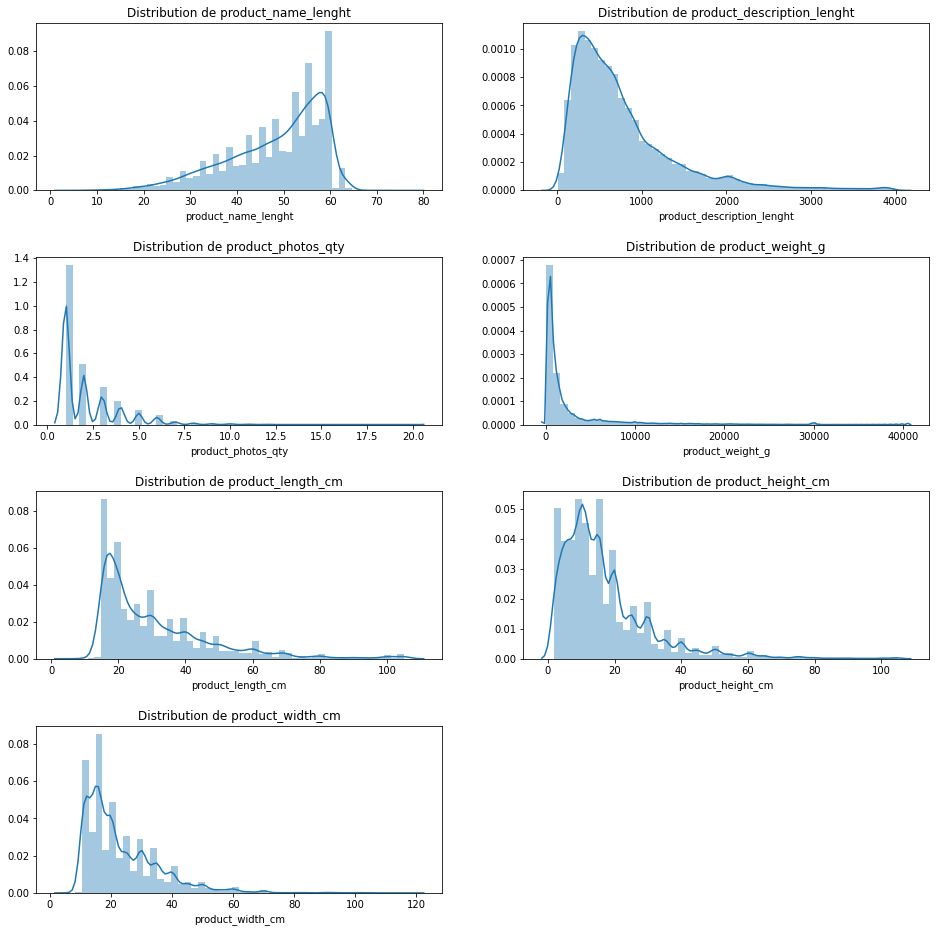

In [12]:
plt.figure(figsize = (16,16))
plt.subplots_adjust(hspace=0.4)
for var,i in zip(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm','product_height_cm','product_width_cm'],range(7)):
    ax = plt.subplot(4,2,i+1)
    ax.set_title('Distribution de '+var)
    sns.distplot(products[var])

#### Analysons désormais la table orders

Deux des variables sont des variables liées à l'identification du client et de l'ordre.

In [13]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


La grande majorité des ordres ont été délivrés (97%), ou sont dans le processus de livraison (shipped, processing, invoiced, approved), le reste étant annulé ou indisponible (1%). Cet e-commerce possède donc un historique de vente conséquent comparé au nombre de commandes en cours.

In [15]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [16]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)

Afin de mieux visualiser les évolutions des ventes au cours du temps, l'impact du jour de la semaine, du mois ou de l'année, je vais créer des variables supplémentaires.


In [17]:
def extract_day(x):
    """
        Input : 
            x : datetime
        Output:
            Jour de la semaine
    """
    dic = {0:'Lundi',1:'Mardi',2:'Mercredi',3:'Jeudi',4:'Vendredi',5:'Samedi',6:'Dimanche'}
    weekday = x.weekday()
    return dic[weekday]
def extract_month(x):
    """
        Input : 
            x: datetime
        Output : 
            Nom du mois
    """
    dic = {1:"Janvier",2:"Février",3:"Mars",4:"Avril",5:"Mai",6:"Juin",7:"Juillet",8:"Août",9:"Septembre",10:"Octobre",
          11:"Novembre",12:"Décembre"}
    month = x.month
    return dic[month]
def extract_year(x):
    """
        Input :
            x : datetime
        Output :
            Année
    """
    return x.year
def extract_month_year(x):
    """
        Input:
            x : datetime
        Output:
            Année et mois
    """
    return x.strftime('%Y%m')

In [18]:
orders['WeekDay'] = orders.order_purchase_timestamp.apply(extract_day)
orders['Month'] = orders.order_purchase_timestamp.apply(extract_month)
orders['NumMonth'] = orders.order_purchase_timestamp.dt.month
orders['Year'] = orders.order_purchase_timestamp.apply(extract_year)
orders['Month_year'] = orders.order_purchase_timestamp.apply(extract_month_year)
orders['Quarter'] = orders.order_purchase_timestamp.dt.quarter

Seul trois mois sont présent en 2016, le nombre de commandes a augmenté sur toute la période. Il est encore en augmentation en 2018 et il ne concerne pourtant que 9 mois de 2018 laissant entendre une croissance plus forte encore sur 2018.

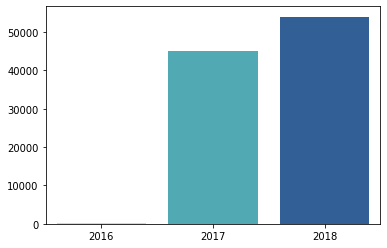

In [19]:
sns.barplot(x = orders.Year.value_counts().index, y = orders.Year.value_counts().values, palette='YlGnBu')

La répartition en fonction du semestre semble être assez identique car nous avons presque uniquement les données de 2017 pour le dernier trimestre de l'année.

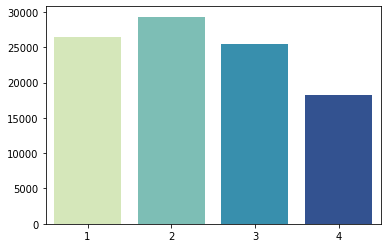

In [20]:
sns.barplot(x = orders.Quarter.value_counts().index, y = orders.Quarter.value_counts().values, palette='YlGnBu')

Les jours de la semaine semble avoir un impact sur le nombre de commande, le week end notamment il y a bien moins de commandes.

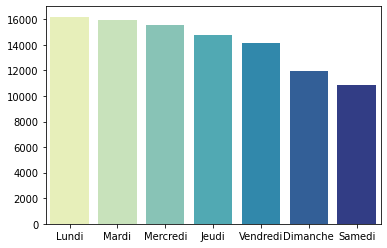

In [21]:
sns.barplot(x = orders.WeekDay.value_counts().index, y = orders.WeekDay.value_counts().values, palette='YlGnBu')

Comme vu précédement, les mois de fin d'année réalisent un nombre de commandes moins important. Tandis que ceux autour de la demi année semblent plus propices.

In [22]:
data = pd.DataFrame()
lst = []
dic = {1:"Janvier",2:"Février",3:"Mars",4:"Avril",5:"Mai",6:"Juin",7:"Juillet",8:"Août",9:"Septembre",10:"Octobre",
          11:"Novembre",12:"Décembre"}
for year in orders.Year.unique():
    for mois in orders.NumMonth.unique():
        nb = len(orders[(orders.NumMonth == mois) & (orders.Year == year)])
        lst += [(year, mois, nb, dic[mois])]
data = pd.DataFrame(lst, columns = ['Annee','NumMois','Nbre',"Mois"])
data = data[data.Annee > 2016]
data.sort_values(["Annee","NumMois"],inplace=True)

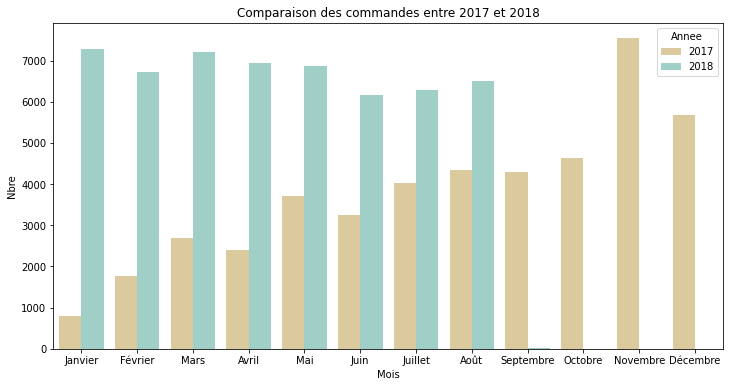

In [23]:
plt.figure(figsize=(12,6))
plt.title('Comparaison des commandes entre 2017 et 2018')
sns.barplot(data = data, x = "Mois", y = "Nbre", hue ="Annee", palette='BrBG')
plt.show()

L'e-commerce semble avoir eu une croissance assez rapide en 2017 pour atteindre en 2018 une stagnation aux alentours de 7000 commandes.

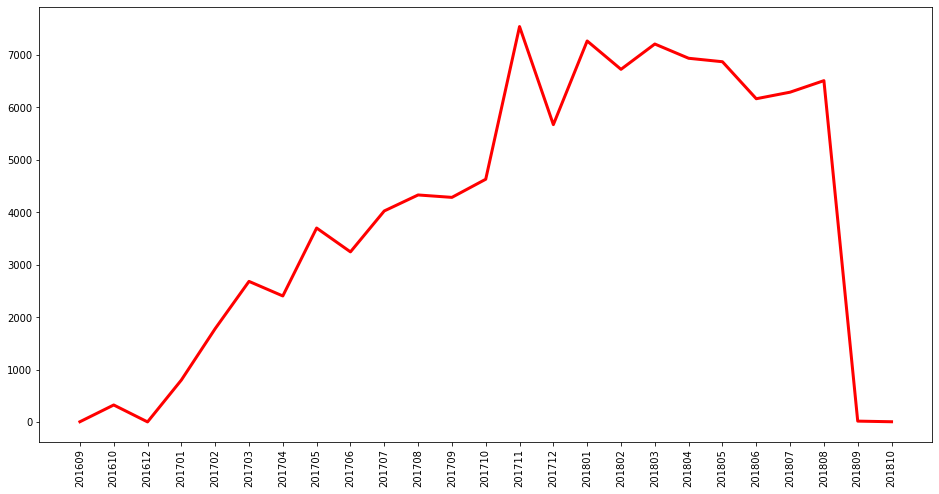

In [24]:
plt.figure(figsize=(16,8))
sns.lineplot(data=orders['Month_year'].value_counts().sort_index(), 
             color='red', linewidth=3)
plt.xticks(rotation=90)
plt.show()

Je vais créer une dernière variable, pour découper l'heure et voir l'influence de celle ci sur le nombre de commande.

In [26]:
def extract_heure(x):
    hour = x.hour
    if hour <= 6:
        return '0-6'
    elif hour > 6 and hour <= 12:
        return '6-12'
    elif hour > 12 and hour <= 18:
        return '12-18'
    elif hour > 18:
        return '18-24'
orders["Hours"] = orders.order_purchase_timestamp.apply(extract_heure)

Les commandes sont plus nombreuses l'après midi avec près de 2 tiers des commandes réalisés à ce moment là. La tranche la moins présente est celle de 0-6 heures

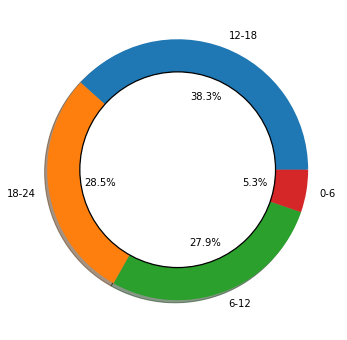

In [27]:
plt.figure(figsize=(12,6))
plt.pie(orders.Hours.value_counts().values / len(orders), explode=(0,0,0,0), labels=orders.Hours.value_counts().index,
        autopct='%1.1f%%', shadow=True)
my_circle=plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Pour les prochaines variables qui sont les heures à laquelle la commande est passé à une étape supérieur, je vais uniquement calculé les délais entre chaque étape.


In [28]:
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [29]:
def diff_delai(x,y):
    return (y - x).days

In [30]:
orders['purchase_approved'] = orders.apply(lambda rows : diff_delai(rows.order_purchase_timestamp, rows.order_approved_at), axis = 1)
orders['approved_carrier'] = orders.apply(lambda rows : diff_delai(rows.order_approved_at, rows.order_delivered_carrier_date), axis = 1)
orders['carrier_customer'] = orders.apply(lambda rows : diff_delai(rows.order_delivered_carrier_date, rows.order_delivered_customer_date), axis = 1)
orders['customer_estimated'] = orders.apply(lambda rows : diff_delai(rows.order_delivered_customer_date, rows.order_estimated_delivery_date), axis = 1)
orders['purchase_customer'] = orders.apply(lambda rows : diff_delai(rows.order_approved_at, rows.order_delivered_customer_date), axis = 1)

Rapidement, les affichages ci-dessous permettent devoir les délais moyens en fonction des étapes.
Par exemple, il faut compter environ 10 jours du passage de la commande à sa reception chez le client.

In [ ]:
for i,var in zip(range(4),['purchase_approved','approved_carrier','carrier_customer','customer_estimated','purchase_customer']):
    print('Variable ' + var + '\n')
    print(orders[var].describe())

#### Analysons désormais la table Customers

Deux des variables sont des variables liées à l'identification du client.

In [32]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [33]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


En regardant les indicatifs des états de chaque client ainsi que les villes, il est facile de conclure que cet e-commerce vend au Brésil ses produits. Voici donc une visualisation rapide du nombre de commandes en fonction de l'état.
